Notebook which takes the output of the context comparison and displays it as a graph

In [1]:
data_file_location = "../data/output/context_comparison.csv"

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import nltk
from nltk.corpus import wordnet as wn

from operations.composition import *
from operations.similarity_measures import *
from operations.logical_negation import *
from operations.worldly_context_creation import *
from operations.helpers import *

import pandas as pd
import matplotlib.pyplot as plt

import pickle
import csv
import random
import math
import copy

import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import MaxNLocator


from matplotlib.lines import Line2D 
from matplotlib.ticker import MaxNLocator

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/benjaminrodatz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
file = []
df = None

with open(data_file_location, newline='') as csvfile:
        # with open('df_i4_all_idneg.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            test = row
            file.append(row)

        df = pd.DataFrame(file[1:])
        df.columns = file[0]


In [4]:
df

,NEGATED,ALTERNATIVE,RELATION,MEANRATING,SPLIT,poly_kE_0.0,poly_trace_0.0,poly_kE_0.3333333333333333,poly_trace_0.3333333333333333,poly_kE_0.6666666666666666,...,scaled_exp_kE_8.666666666666666,scaled_exp_trace_8.666666666666666,scaled_exp_kE_9.0,scaled_exp_trace_9.0,scaled_exp_kE_9.333333333333334,scaled_exp_trace_9.333333333333334,scaled_exp_kE_9.666666666666666,scaled_exp_trace_9.666666666666666,scaled_exp_kE_10.0,scaled_exp_trace_10.0
0,goat,beard,free_association,1.3,train,0.2725345546525523,0.0363567544346257,0.2437635833633963,0.0376056532968703,0.2298893547432197,...,0.1773176729848284,0.0418288343181415,0.1766469764512085,0.0418814267459957,0.1760057315319954,0.0419323450339492,0.1753907960675712,0.0419817727686965,0.1747995043975173,0.0420298616977662
1,alligator,teeth,free_association,1.5,test,0.3504553757351839,0.0384209411341161,0.3062518487536679,0.0403279615524382,0.2834780343422182,...,0.1540341008442877,0.0502419342167021,0.1513241693378595,0.0503546388281652,0.1487570275371963,0.0504545078302321,0.1463218626475495,0.0505427616203261,0.1440089085986527,0.0506205104893431
2,chair,office,hypernym,1.6,train,0.3730709948089469,0.0317932507162331,0.3656538941189078,0.0323851189614202,0.3615209531156619,...,0.3017076001030004,0.0344834275745394,0.2990079595345882,0.0345484368810806,0.2963812636216396,0.0346113133386923,0.2938272941155274,0.0346721660497574,0.2913454700163643,0.0347310982107331
3,yacht,job,unrelated,1.45,train,0.446200856736303,0.0512455499724917,0.3833465609816978,0.0509352422414518,0.3351534726321875,...,0.1232082365659934,0.0354110209094818,0.1196500829090578,0.035014074993232,0.1163172819860325,0.0346350430174024,0.1131891025723934,0.0342728928694225,0.1102471729010184,0.0339266376184827
4,goose,ducks,distributional,4.1,test,0.6118569289754264,0.056974401167166,0.6407461398894402,0.0659474562296052,0.6553317626162216,...,0.6049420805944964,0.1018437026269107,0.5996132612397232,0.1020272036716597,0.5943424874098118,0.102173175213366,0.5891377459024876,0.1022858056998867,0.5840054608802479,0.1023688082276659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,trout,living,unrelated,1.0,test,0.3248947336226511,0.039029603959328,0.2750506752402373,0.038003544097607,0.2481322561510641,...,0.1056630075271471,0.0370324618772268,0.1035300604124513,0.0371168362366094,0.1015171031541593,0.0372016340667594,0.0996129749573235,0.0372865111468136,0.0978079527719765,0.0373711853509709
1227,jacket,ones,unrelated,1.0,train,0.5301676868183687,0.0489944662980614,0.4491093064291931,0.0479952224119836,0.4020522945857373,...,0.2179689973173628,0.0392507355125753,0.2153419713315575,0.0391282570805574,0.2129182143999317,0.0390161368650261,0.2106758737332215,0.0389133712501506,0.2085957642662745,0.0388190518035372
1228,television,rediffusion,cohyponym,1.4,test,0.3570355916636492,0.0415583275442998,0.3346201440693314,0.0536764057619404,0.3103051055111904,...,0.2057442874761015,0.1182908030004682,0.2037149092303567,0.1199441146275316,0.2018002913692158,0.12149947378674,0.1999904808934004,0.122962184714005,0.1982766245334641,0.124337441483519
1229,corn,students,unrelated,1.2,test,0.3575461982272825,0.0344736262013353,0.299952626868504,0.033633909699795,0.268047032967841,...,0.1088862846327415,0.0279509730246824,0.1064563892547882,0.0278372254996188,0.1041767815804306,0.0277284688862925,0.1020329310249446,0.0276242742983777,0.1000120825735026,0.0275242586694527


In [5]:
# convert the rows after row 5 to numeric.
# It is assumed that these only contain numbers which can then be compared to the human rating.
# This cell prints all rows which have been found and will eventually be compared to the human rating.


df["MEANRATING"] = pd.to_numeric(df["MEANRATING"])
for col in df.columns[5:]:
    print(col)
#     print(df[col])
    df[col] = pd.to_numeric(df[col])
    



poly_kE_0.0
poly_trace_0.0
poly_kE_0.3333333333333333
poly_trace_0.3333333333333333
poly_kE_0.6666666666666666
poly_trace_0.6666666666666666
poly_kE_1.0
poly_trace_1.0
poly_kE_1.3333333333333333
poly_trace_1.3333333333333333
poly_kE_1.6666666666666667
poly_trace_1.6666666666666667
poly_kE_2.0
poly_trace_2.0
poly_kE_2.3333333333333335
poly_trace_2.3333333333333335
poly_kE_2.6666666666666665
poly_trace_2.6666666666666665
poly_kE_3.0
poly_trace_3.0
poly_kE_3.3333333333333335
poly_trace_3.3333333333333335
poly_kE_3.6666666666666665
poly_trace_3.6666666666666665
poly_kE_4.0
poly_trace_4.0
poly_kE_4.333333333333333
poly_trace_4.333333333333333
poly_kE_4.666666666666667
poly_trace_4.666666666666667
poly_kE_5.0
poly_trace_5.0
poly_kE_5.333333333333333
poly_trace_5.333333333333333
poly_kE_5.666666666666667
poly_trace_5.666666666666667
poly_kE_6.0
poly_trace_6.0
poly_kE_6.333333333333333
poly_trace_6.333333333333333
poly_kE_6.666666666666667
poly_trace_6.666666666666667
poly_kE_7.0
poly_trace_7.

hypkhyp2_kE_7.0
hypkhyp2_trace_7.0
hypkhyp2_kE_7.333333333333333
hypkhyp2_trace_7.333333333333333
hypkhyp2_kE_7.666666666666667
hypkhyp2_trace_7.666666666666667
hypkhyp2_kE_8.0
hypkhyp2_trace_8.0
hypkhyp2_kE_8.333333333333334
hypkhyp2_trace_8.333333333333334
hypkhyp2_kE_8.666666666666666
hypkhyp2_trace_8.666666666666666
hypkhyp2_kE_9.0
hypkhyp2_trace_9.0
hypkhyp2_kE_9.333333333333334
hypkhyp2_trace_9.333333333333334
hypkhyp2_kE_9.666666666666666
hypkhyp2_trace_9.666666666666666
hypkhyp2_kE_10.0
hypkhyp2_trace_10.0
hypkBA_kE_0.0
hypkBA_trace_0.0
hypkBA_kE_0.3333333333333333
hypkBA_trace_0.3333333333333333
hypkBA_kE_0.6666666666666666
hypkBA_trace_0.6666666666666666
hypkBA_kE_1.0
hypkBA_trace_1.0
hypkBA_kE_1.3333333333333333
hypkBA_trace_1.3333333333333333
hypkBA_kE_1.6666666666666667
hypkBA_trace_1.6666666666666667
hypkBA_kE_2.0
hypkBA_trace_2.0
hypkBA_kE_2.3333333333333335
hypkBA_trace_2.3333333333333335
hypkBA_kE_2.6666666666666665
hypkBA_trace_2.6666666666666665
hypkBA_kE_3.0
hypkBA_

In [6]:
#extract the correlations for visualization

values = [
#           'poly', 
          'poly_trace', 
          'scaled_exp_trace', 
          'hypkE1_trace', 
#           'hyptrace_trace', 
              'hypkhyp2_trace', 
#               'hyptrace_trace', 
#           'hypkBA_trace', 
#           'hyptrace_trace', 
#           'swap_kE', 
#           'kE1', 
#           'swap_trace_left', 
#           'kE2', 
#           'swap_trace_right',
#           'swap_trace_both'
         ]

columns = copy.copy(values)
columns.append('x')
print(columns)
print(values)

df_exponents = pd.DataFrame(columns=columns)
for loop_i in range(0, 31):
    i = loop_i / 3
    data = {}
    for col in df_exponents.columns:
        if col == 'x':
            data["x"] = i
            continue
        
        corr = round(df.corrwith(df[col +"_" + str(i)], method="pearson")["MEANRATING"], 3)
#         if (col.find("swap_kE") != -1):
#             print(df[col +"_" + str(i)])
        data[col] = corr
      
    
    
    df_exponents = df_exponents.append(data, ignore_index=True)


# df_exponents.head(25)
for i in range(len(values)):
    print(values[i], df_exponents[values[i]].max())

['poly_trace', 'scaled_exp_trace', 'hypkE1_trace', 'hypkhyp2_trace', 'x']
['poly_trace', 'scaled_exp_trace', 'hypkE1_trace', 'hypkhyp2_trace']
poly_trace 0.631
scaled_exp_trace 0.631
hypkE1_trace 0.627
hypkhyp2_trace 0.654


['poly_trace', 'scaled_exp_trace', 'hypkE1_trace', 'hypkhyp2_trace']
poly_trace 0.631
scaled_exp_trace 0.631
hypkE1_trace 0.627
hypkhyp2_trace 0.654


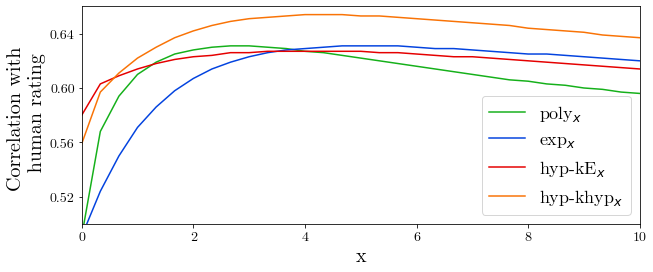

In [7]:
#visualize the correlation per context function as used in paper

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))


path = '/usr/share/fonts/truetype/newfonts/cmunrm.ttf'
prop = font_manager.FontProperties(fname=path, size=18)
prop_smaller = font_manager.FontProperties(fname=path, size=14)


colors = ['xkcd:green', 'xkcd:blue', 'xkcd:red', 'xkcd:orange', 'xkcd:purple']
labels = ['poly$_x$', 'exp$_x$', 'hyp-kE$_x$', 'hyp-khyp$_x$', 'test2']
    
print(values)
ax.set_ylim(0.5, 0.66)
ax.set_xlim(0, 10)
ax.set_ylabel("Correlation with \n human rating", fontsize=20, fontproperties=prop)
ax.set_xlabel("x", fontsize=20, fontproperties=prop)

for i in range(len(values)):
    print(values[i], df_exponents[values[i]].max())
    df_exponents.plot(ax = ax, x='x', 
                  y=values[i], 
                  label=labels[i], c=colors[i]
                 )
ax.tick_params(axis='x')
ax.tick_params(axis='y')

ax.yaxis.set_major_locator(MaxNLocator(5)) 

for label in ax.get_yticklabels():
    label.set_fontproperties(prop_smaller)
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop_smaller)

plt.legend(loc=4, prop=prop)

# plt.savefig("ContextFunction", bbox_inches='tight')